In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
data = pd.read_csv('../thread_count_performance_measurements.csv')

data = data.transpose()
data.columns = data.loc['runName']
data = data.drop(list(filter(lambda x: not x.isdigit(), data.index)), axis=0)
data.loc['mean'] = data.mean(axis=0).round().astype(int)

data

4855.393939393939

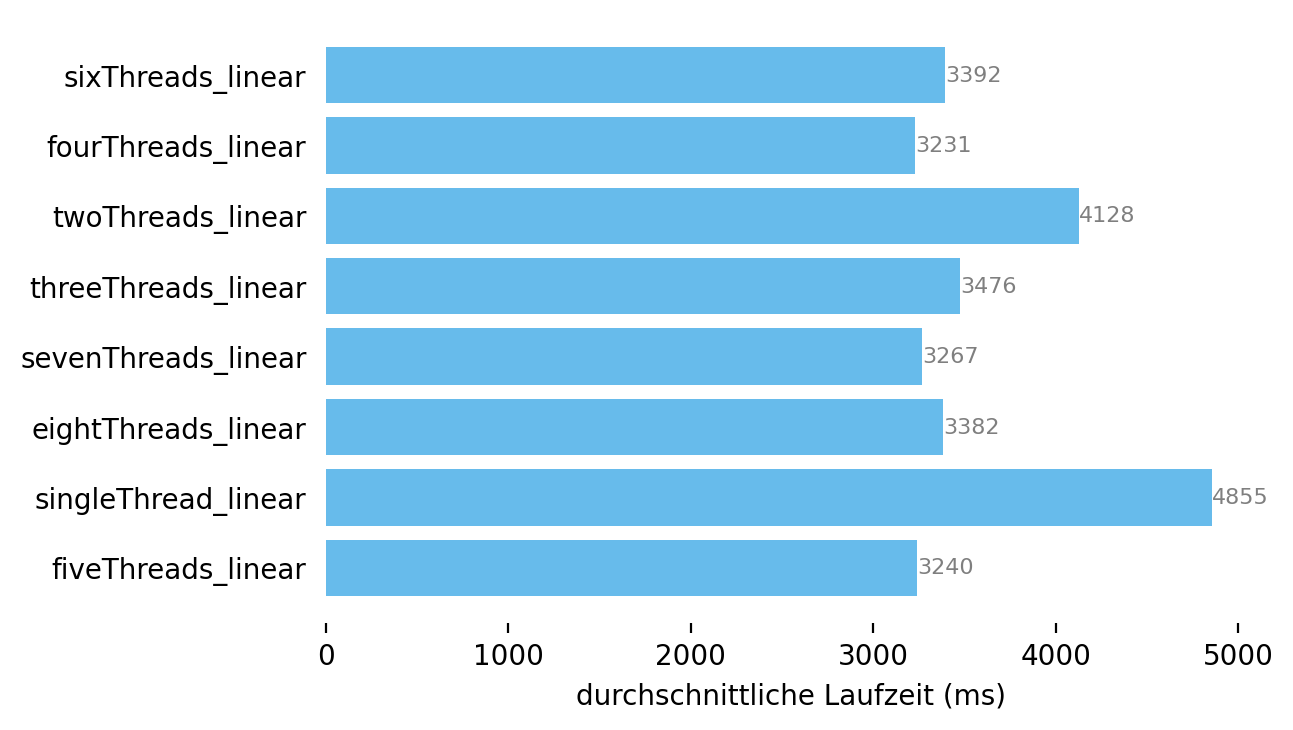

In [3]:
from matplotlib.text import Text

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.barh(data.columns, data.loc['mean'], color='#56B4E9', alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)')
plt.tick_params(left = False)

# Die Ausführungszeit an den Balken angezeigen
for i, rect in enumerate(bar_plot):
    text: Text = plt.text(i, data.columns[i], data.loc['mean'][i], verticalalignment='center', horizontalalignment='left',alpha=0.5, fontsize=8)
    text.set_x(rect.get_width())
    

for spine in ax.spines.values():
    spine.set_visible(False)

In [14]:
fig.savefig('measurements_thread_count_new.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')

In [29]:
dataNew = {'threads': [1, 2, 3, 4, 5, 6, 7, 8], 'laufzeit': [data['singleThread_linear'].mean().round().astype(int), data['twoThreads_linear'].mean().round().astype(int), data['threeThreads_linear'].mean().round().astype(int), data['fourThreads_linear'].mean().round().astype(int), data['fiveThreads_linear'].mean().round().astype(int), data['sixThreads_linear'].mean().round().astype(int), data['sevenThreads_linear'].mean().round().astype(int), data['eightThreads_linear'].mean().round().astype(int)]}

df = pd.DataFrame(dataNew,columns=['threads','laufzeit'])

#Korrelationsmatrix erstellen
df.corr()

,threads,laufzeit
threads,1.000000,-0.750552
laufzeit,-0.750552,1.000000


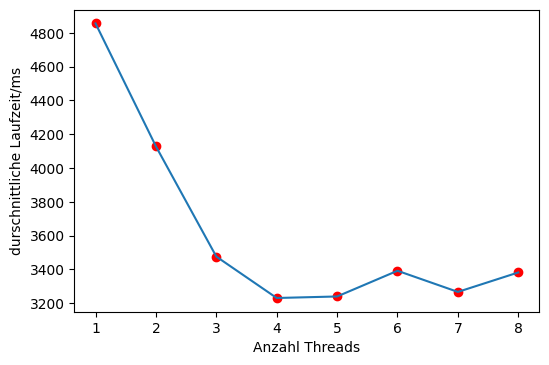

In [61]:
x, y = dataNew['threads'], dataNew['laufzeit']

plt.subplots(figsize=(6,4), dpi=100)
plt.scatter(x, y, color='r')
plt.plot(x, y)
plt.xlabel("Anzahl Threads")
plt.ylabel("durschnittliche Laufzeit/ms")
plt.show()